<a href="https://colab.research.google.com/github/tlkt/fast_lesson_work/blob/master/fast_lesson_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
path = 'drive/My Drive/images'

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
path = untar_data(URLs.MNIST_TINY); path

PosixPath('/root/.fastai/data/mnist_tiny')

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=10)

In [4]:
learn = cnn_learner(data,models.resnet34,metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 266MB/s]


In [6]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.672357,0.514748,0.789700,00:02
1,0.598098,0.485159,0.779685,00:01
2,0.597066,0.350566,0.844063,00:01
3,0.564009,0.322042,0.879828,00:01
4,0.547234,0.337311,0.866953,00:02
5,0.514108,0.292843,0.899857,00:02
6,0.490007,0.284654,0.907010,00:02
7,0.477693,0.284429,0.905579,00:02


In [0]:
learn.save('stage-1')

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

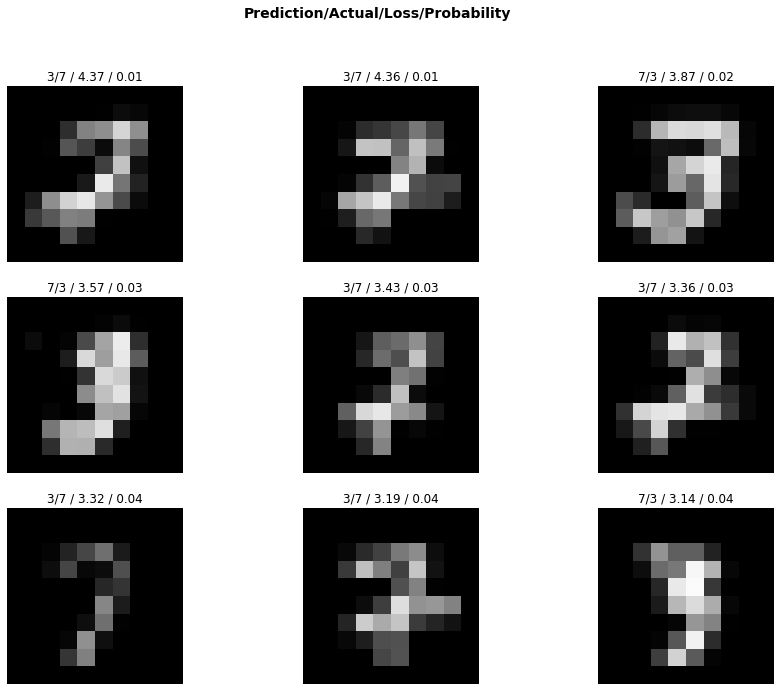

In [10]:
interp.plot_top_losses(9,figsize=(15,11))

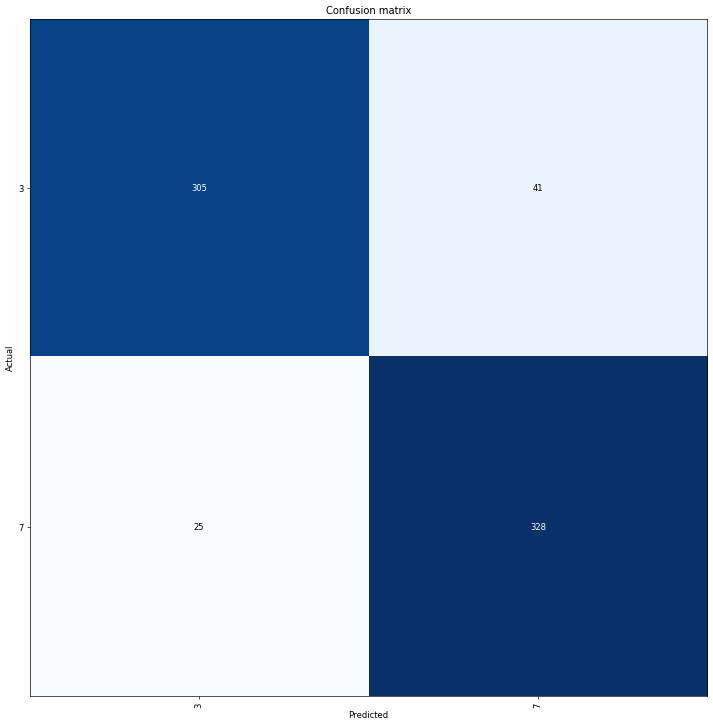

In [11]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('3', '7', 41), ('7', '3', 25)]

In [0]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.379224,0.167153,0.934192,00:02


In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


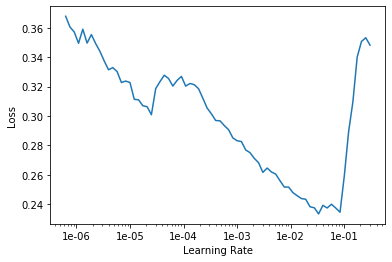

In [16]:
learn.recorder.plot()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.601984,0.343119,0.932761,00:02
1,0.584017,0.192848,0.969957,00:02


In [0]:
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=10)

In [21]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 263MB/s]


In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


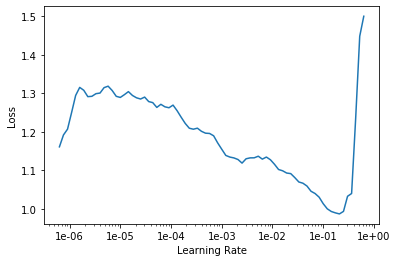

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.164865,1.561768,0.492132,00:02
1,1.080857,1.615084,0.462089,00:02
2,1.080004,1.516736,0.513591,00:02
3,0.973363,1.034296,0.390558,00:02
4,0.902504,0.693681,0.301860,00:02
5,0.826761,0.603830,0.291846,00:02
6,0.763802,0.470931,0.224607,00:02
7,0.717728,0.404664,0.180258,00:02


In [0]:
learn.save('stage-1-50')

In [26]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-5,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,1.497537,43.897488,0.236051,00:02
1,1.297050,0.208006,0.041488,00:02
2,0.916453,0.093966,0.028612,00:02


In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('7', '3', 11), ('3', '7', 9)]